## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


### Dataset

In this homework, we will use the Laptops price dataset from [Kaggle](https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv):


In [36]:


!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv



--2024-10-08 00:38:29--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: 'laptops.csv.2'

     0K .......... .......... .......... .......... .......... 17%  718K 0s
    50K .......... .......... .......... .......... .......... 34% 2.82M 0s
   100K .......... .......... .......... .......... .......... 51% 1.15M 0s
   150K .......... .......... .......... .......... .......... 68% 6.16M 0s
   200K .......... .......... .......... .......... .......... 85% 5.36M 0s
   250K .......... .......... .......... .......... .         100% 1.45M=0.2s

2024-10-08 00:38:30 (1.63 MB/s) - 'laptops.csv.2' saved [298573/298573]




The goal of this homework is to create a regression model for predicting the prices (column `'Final Price'`).

### Preparing the dataset 

First, we'll normalize the names of the columns:



In [37]:
import pandas as pd

df = pd.read_csv('laptops.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')

Now, instead of `'Final Price'`, we have `'final_price'`.
Next, use only the following columns:

* `'ram'`,
* `'storage'`,
* `'screen'`,
* `'final_price'`


In [38]:
# 選取指定的四個欄位
selected_columns = ['ram', 'storage', 'screen', 'final_price']

# 創建新的 DataFrame，只包含選定的欄位
df = df[selected_columns]

# 顯示新 DataFrame 的前幾行，以確認資料已正確選取
print(df.head())

# 顯示新 DataFrame 的基本資訊
print(df.info())


   ram  storage  screen  final_price
0    8      512    15.6      1009.00
1    8      256    15.6       299.00
2    8      256    15.6       789.00
3   16     1000    15.6      1199.00
4   16      512    15.6       669.01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ram          2160 non-null   int64  
 1   storage      2160 non-null   int64  
 2   screen       2156 non-null   float64
 3   final_price  2160 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 67.6 KB
None



### EDA
* Look at the `final_price` variable. Does it have a long tail? 


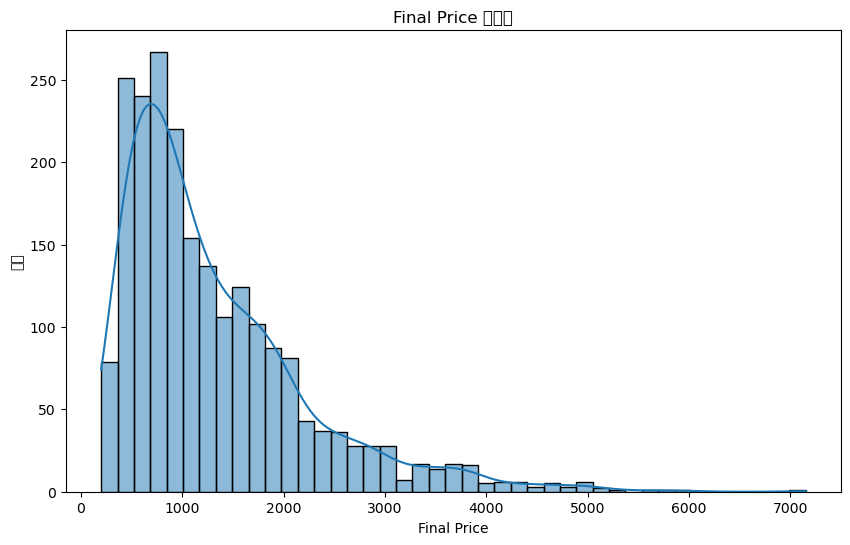

Final Price 的偏度（skewness）: 1.65


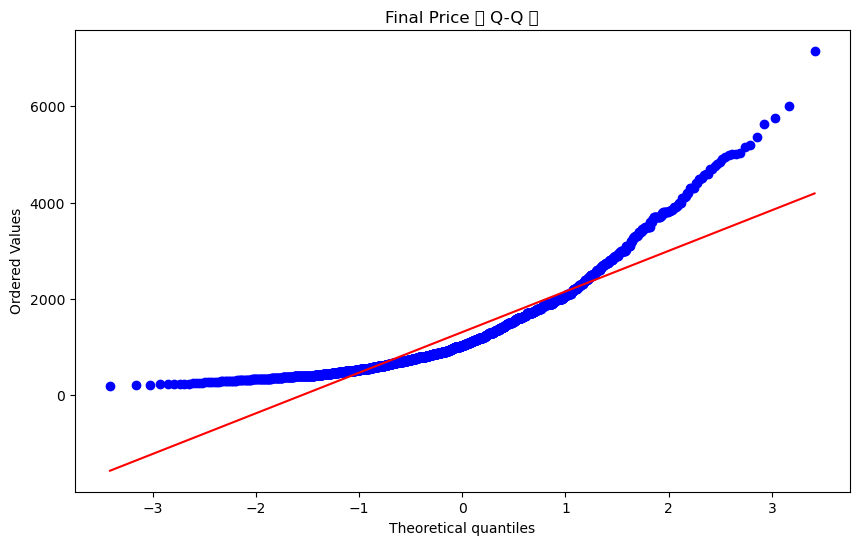

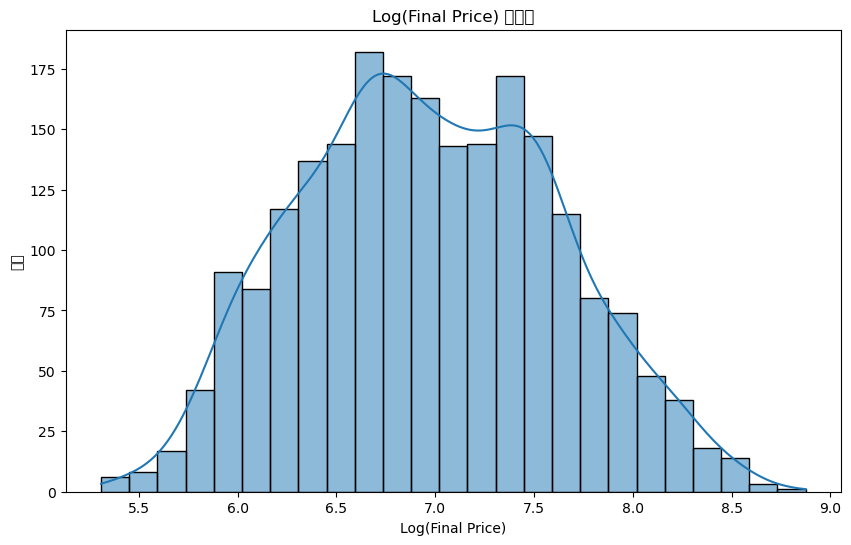

如果 Q-Q 圖顯示的點偏離直線，特別是在尾部，那麼數據就有長尾。
正偏度（正值）表示分布有右偏（長尾在右側），負偏度（負值）表示左偏。
絕對值越大，偏斜程度越嚴重。通常，絕對值大於 1 被認為是顯著偏斜。


In [39]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# # 設置中文字體，如果您的系統支持的話
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用來正常顯示中文標籤
# plt.rcParams['axes.unicode_minus'] = False  # 用來正常顯示負號

# 繪製 final_price 的分布圖
plt.figure(figsize=(10, 6))
sns.histplot(df['final_price'], kde=True)
plt.title('Final Price 的分布')
plt.xlabel('Final Price')
plt.ylabel('頻率')
plt.show()

# 計算偏度（skewness）
skewness = df['final_price'].skew()
print(f"Final Price 的偏度（skewness）: {skewness:.2f}")

# 繪製 Q-Q 圖來檢查是否有長尾
plt.figure(figsize=(10, 6))
from scipy import stats
stats.probplot(df['final_price'], dist="norm", plot=plt)
plt.title('Final Price 的 Q-Q 圖')
plt.show()

# 如果數據範圍很大，可以考慮使用對數轉換
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df['final_price']), kde=True)
plt.title('Log(Final Price) 的分布')
plt.xlabel('Log(Final Price)')
plt.ylabel('頻率')
plt.show()

print("如果 Q-Q 圖顯示的點偏離直線，特別是在尾部，那麼數據就有長尾。")
print("正偏度（正值）表示分布有右偏（長尾在右側），負偏度（負值）表示左偏。")
print("絕對值越大，偏斜程度越嚴重。通常，絕對值大於 1 被認為是顯著偏斜。")




### Question 1

There's one column with missing values. What is it?

* `'ram'`
* `'storage'`
* `'screen'`
* `'final_price'`


In [40]:
# df

In [41]:
# 檢查每個欄位的缺失值數量
missing_values = df.isnull().sum()

# 顯示有缺失值的欄位
print("有缺失值的欄位：")
print(missing_values[missing_values > 0])

# 找出有缺失值的欄位名稱
missing_column = missing_values[missing_values > 0].index[0]
print(f"\n有缺失值的欄位是：{missing_column}")

# 計算缺失值的百分比
missing_percentage = (df[missing_column].isnull().sum() / len(df)) * 100
print(f"{missing_column} 欄位的缺失值百分比：{missing_percentage:.2f}%")

# 顯示包含缺失值的前幾行數據
print("\n包含缺失值的前幾行數據：")
print(df[df[missing_column].isnull()].head())

# 提供一些關於如何處理缺失值的建議
print("\n處理缺失值的建議：")
print("1. 如果缺失值比例較小，可以考慮刪除這些行。")
print("2. 可以使用平均值、中位數或眾數來填充缺失值。")
print("3. 如果缺失值與其他特徵相關，可以考慮使用這些特徵來預測缺失值。")
print("4. 可以創建一個新的二元特徵，表示該值是否缺失。")



有缺失值的欄位：
screen    4
dtype: int64

有缺失值的欄位是：screen
screen 欄位的缺失值百分比：0.19%

包含缺失值的前幾行數據：
      ram  storage  screen  final_price
624     8      256     NaN       524.99
1430   16      512     NaN      1863.52
1503   16      512     NaN      1505.00
1548   16      512     NaN      2569.00

處理缺失值的建議：
1. 如果缺失值比例較小，可以考慮刪除這些行。
2. 可以使用平均值、中位數或眾數來填充缺失值。
3. 如果缺失值與其他特徵相關，可以考慮使用這些特徵來預測缺失值。
4. 可以創建一個新的二元特徵，表示該值是否缺失。



### Question 2

What's the median (50% percentile) for variable `'ram'`?

- 8
- 16
- 24
- 32



'ram' 欄位的中位數是：16.0


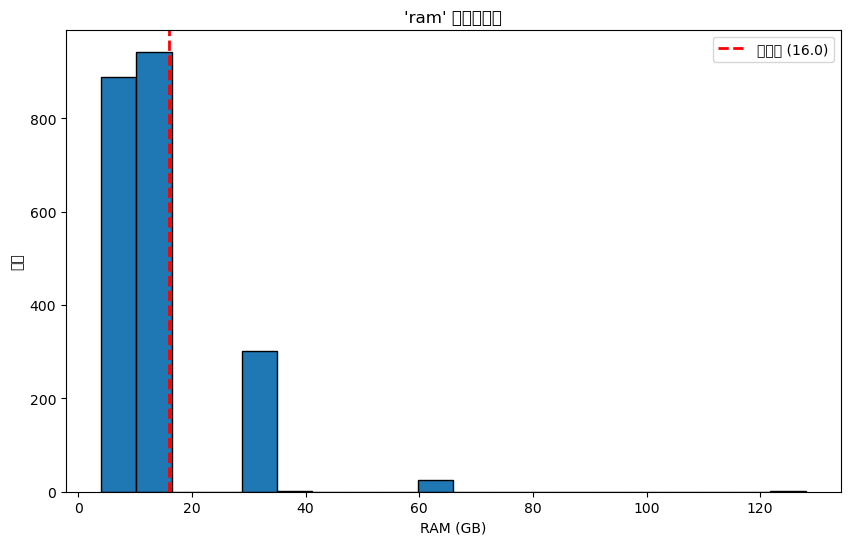


'ram' 欄位的描述性統計：
count    2160.000000
mean       15.413889
std         9.867815
min         4.000000
25%         8.000000
50%        16.000000
75%        16.000000
max       128.000000
Name: ram, dtype: float64

解釋：
1. 'ram' 欄位的中位數是 16.0 GB。
2. 這意味著有一半的筆記型電腦的 RAM 小於或等於這個值，另一半大於或等於這個值。
3. 從直方圖中，我們可以看到 RAM 的分佈情況，紅色虛線表示中位數的位置。
4. 描述性統計提供了更多關於 RAM 分佈的信息，包括平均值、標準差、最小值和最大值等。


In [29]:
# 計算 'ram' 欄位的中位數
ram_median = df['ram'].median()

print(f"'ram' 欄位的中位數是：{ram_median}")

# 視覺化 'ram' 的分佈
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['ram'], bins=20, edgecolor='black')
plt.title("'ram' 欄位的分佈")
plt.xlabel("RAM (GB)")
plt.ylabel("頻率")
plt.axvline(ram_median, color='red', linestyle='dashed', linewidth=2, label=f'中位數 ({ram_median})')
plt.legend()
plt.show()

# 顯示一些描述性統計
print("\n'ram' 欄位的描述性統計：")
print(df['ram'].describe())

# 解釋結果
print("\n解釋：")
print(f"1. 'ram' 欄位的中位數是 {ram_median} GB。")
print("2. 這意味著有一半的筆記型電腦的 RAM 小於或等於這個值，另一半大於或等於這個值。")
print("3. 從直方圖中，我們可以看到 RAM 的分佈情況，紅色虛線表示中位數的位置。")
print("4. 描述性統計提供了更多關於 RAM 分佈的信息，包括平均值、標準差、最小值和最大值等。")





### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures


In [30]:
# 設置隨機種子以確保結果可重現
import numpy as np
np.random.seed(42)

# 打亂數據集
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# 計算分割點
n = len(df_shuffled)
n_train = int(0.6 * n)
n_val = int(0.2 * n)

# 分割數據集
train = df_shuffled[:n_train]
val = df_shuffled[n_train:n_train+n_val]
test = df_shuffled[n_train+n_val:]

print(f"訓練集大小: {len(train)}")
print(f"驗證集大小: {len(val)}")
print(f"測試集大小: {len(test)}")

# 解釋分割過程
print("\n解釋：")
print("1. 我們首先使用 numpy 的 random.seed(42) 設置隨機種子，確保結果可重現。")
print("2. 使用 pandas 的 sample() 方法打亂整個數據集，frac=1 表示取所有數據。")
print("3. 計算分割點：訓練集佔 60%，驗證集和測試集各佔 20%。")
print("4. 使用切片操作將打亂後的數據集分割為訓練集、驗證集和測試集。")
print("5. 最後，我們打印每個集合的大小以確認分割是否正確。")


訓練集大小: 1296
驗證集大小: 432
測試集大小: 432

解釋：
1. 我們首先使用 numpy 的 random.seed(42) 設置隨機種子，確保結果可重現。
2. 使用 pandas 的 sample() 方法打亂整個數據集，frac=1 表示取所有數據。
3. 計算分割點：訓練集佔 60%，驗證集和測試集各佔 20%。
4. 使用切片操作將打亂後的數據集分割為訓練集、驗證集和測試集。
5. 最後，我們打印每個集合的大小以確認分割是否正確。



### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good



In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# 這裡我們導入了必要的函數和模組
# LinearRegression 用於創建和訓練線性回歸模型
# mean_squared_error 用於計算均方誤差，這是計算 RMSE 的基礎
# numpy (as np) 用於進行數學運算，例如計算平方根

# 注意：我們沒有導入 pandas，因為看起來您已經在之前的代碼中導入並使用了它

df.columns

Index(['ram', 'storage', 'screen', 'final_price'], dtype='object')

In [32]:
# 從問題1中獲取特徵列名稱
feature_column = 'screen'

# 計算訓練集中特徵列的平均值
mean_value = train[feature_column].mean()

# 創建兩個數據集副本，分別用0和平均值填充缺失值
train_fill_0 = train.copy()
val_fill_0 = val.copy()
train_fill_mean = train.copy()
val_fill_mean = val.copy()

train_fill_0[feature_column] = train_fill_0[feature_column].fillna(0)
val_fill_0[feature_column] = val_fill_0[feature_column].fillna(0)
train_fill_mean[feature_column] = train_fill_mean[feature_column].fillna(mean_value)
val_fill_mean[feature_column] = val_fill_mean[feature_column].fillna(mean_value)

# 準備特徵和目標變量
X_train_0 = train_fill_0[['screen', 'ram', 'storage']]
X_val_0 = val_fill_0[['screen', 'ram', 'storage']]
X_train_mean = train_fill_mean[['screen', 'ram', 'storage']]
X_val_mean = val_fill_mean[['screen', 'ram', 'storage']]

y_train = train['final_price']
y_val = val['final_price']

# 訓練線性回歸模型（填充0）
model_0 = LinearRegression()
model_0.fit(X_train_0, y_train)

# 訓練線性回歸模型（填充平均值）
model_mean = LinearRegression()
model_mean.fit(X_train_mean, y_train)

# 在驗證集上進行預測
y_pred_0 = model_0.predict(X_val_0)
y_pred_mean = model_mean.predict(X_val_mean)

# 計算RMSE
rmse_0 = round(np.sqrt(mean_squared_error(y_val, y_pred_0)), 2)
rmse_mean = round(np.sqrt(mean_squared_error(y_val, y_pred_mean)), 2)

print(f"RMSE (填充0): {rmse_0}")
print(f"RMSE (填充平均值): {rmse_mean}")

# 比較兩種方法
if rmse_0 < rmse_mean:
    print("填充0的方法效果更好")
elif rmse_0 > rmse_mean:
    print("填充平均值的方法效果更好")
else:
    print("兩種方法效果相同")


RMSE (填充0): 597.36
RMSE (填充平均值): 600.27
填充0的方法效果更好


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ram          1296 non-null   int64  
 1   storage      1296 non-null   int64  
 2   screen       1293 non-null   float64
 3   final_price  1296 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 40.6 KB


In [34]:
# 從問題1中獲取特徵列名稱
feature_column = 'screen'

# 計算訓練集中特徵列的平均值
mean_value = train[feature_column].mean()


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100


In [35]:

import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# 準備數據
X_train = train.drop('final_price', axis=1)
y_train = train['final_price']
X_val = val.drop('final_price', axis=1)
y_val = val['final_price']

# 填充缺失值
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# 定義不同的 r 值
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

# 儲存每個 r 值對應的 RMSE
rmse_scores = {}

# 對每個 r 值訓練模型並計算 RMSE
for r in r_values:
    # 訓練模型
    model = Ridge(alpha=r)
    model.fit(X_train_imputed, y_train)
    
    # 預測驗證集
    y_pred = model.predict(X_val_imputed)
    
    # 計算 RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores[r] = round(rmse, 2)

# 找出最佳的 r 值
best_r = min(rmse_scores, key=rmse_scores.get)

print("RMSE scores for different r values:")
for r, rmse in rmse_scores.items():
    print(f"r = {r}: RMSE = {rmse}")

print(f"\nBest r value: {best_r}")
print(f"Best RMSE: {rmse_scores[best_r]}")



RMSE scores for different r values:
r = 0: RMSE = 597.36
r = 0.01: RMSE = 597.36
r = 0.1: RMSE = 597.36
r = 1: RMSE = 597.36
r = 5: RMSE = 597.36
r = 10: RMSE = 597.36
r = 100: RMSE = 597.34

Best r value: 100
Best RMSE: 597.34





### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 19.176
- 29.176
- 39.176
- 49.176

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.


In [43]:
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_shuffled

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00
...,...,...,...,...
2155,8,512,15.0,1838.29
2156,8,256,15.6,531.80
2157,8,256,13.3,765.33
2158,8,512,14.0,803.61


In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# 定義種子值列表
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# 初始化一個列表來存儲每個種子的RMSE分數
rmse_scores = []

# 對每個種子進行迭代
for seed in seeds:
    # 使用當前種子進行數據分割
    df_shuffled = df.sample(frac=1, random_state=seed).reset_index(drop=True)

    # 計算分割點
    n = len(df_shuffled)
    n_train = int(0.6 * n)
    n_val = int(0.2 * n)

    # 分割數據集
    train = df_shuffled[:n_train]
    val = df_shuffled[n_train:n_train+n_val]
    test = df_shuffled[n_train+n_val:]
    train_fill_0 = train.copy()
    val_fill_0 = val.copy()
    train_fill_0[feature_column] = train_fill_0[feature_column].fillna(0)
    val_fill_0[feature_column] = val_fill_0[feature_column].fillna(0)
    X_train_0 = train_fill_0[['screen', 'ram', 'storage']]
    X_val_0 = val_fill_0[['screen', 'ram', 'storage']]
    y_train = train['final_price']
    y_val = val['final_price']



    # X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    # X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=seed)  # 0.25 x 0.8 = 0.2

    # 使用0填充缺失值
    # imputer = SimpleImputer(strategy='constant', fill_value=0)
    # X_train_imputed = imputer.fit_transform(X_train)
    # X_val_imputed = imputer.transform(X_val)

    # 訓練線性回歸模型（無正則化）
    model = LinearRegression()
    model.fit(X_train_0, y_train)

    # 在驗證集上進行預測
    y_pred = model.predict(X_val_0)

    # 計算RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(rmse)

# 計算RMSE分數的標準差
std_rmse = np.std(rmse_scores)

# 將結果四捨五入到小數點後三位
rounded_std = round(std_rmse, 3)

print(f"RMSE scores for different seeds: {rmse_scores}")
print(f"Standard deviation of RMSE scores: {rounded_std}")


RMSE scores for different seeds: [565.452086877098, 636.7985423056722, 588.9558697907969, 597.8148920012526, 571.9627915111034, 573.2383256618948, 647.3438328407253, 550.4398184485933, 587.3335036169914, 576.101792943311]
Standard deviation of RMSE scores: 29.176




### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 598.60
- 608.60
- 618.60
- 628.60


In [48]:
df_shuffled = df.sample(frac=1, random_state=9).reset_index(drop=True)

# 計算分割點
n = len(df_shuffled)
n_train = int(0.6 * n)
n_val = int(0.2 * n)

# 分割數據集
train_val = df_shuffled[:n_train+n_val]
# val = df_shuffled[n_train:n_train+n_val]
test = df_shuffled[n_train+n_val:]
train_fill_0 = train_val.copy()
test_fill_0 = test.copy()
train_fill_0[feature_column] = train_fill_0[feature_column].fillna(0)
test_fill_0[feature_column] = test_fill_0[feature_column].fillna(0)
X_train_0 = train_fill_0[['screen', 'ram', 'storage']]
X_test_0 = test_fill_0[['screen', 'ram', 'storage']]
y_train = train_fill_0['final_price']
y_test = test['final_price']
model = Ridge(alpha=0.001)
model.fit(X_train_0, y_train)

# 在測試集上進行預測
y_pred = model.predict(X_test_0)

# 計算RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 將結果四捨五入到小數點後兩位
rounded_rmse = round(rmse, 2)

print(f"RMSE on the test dataset: {rounded_rmse}")

RMSE on the test dataset: 608.61
